#1. Mount Drive

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!ls -al "/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data"

total 4080
-rw------- 1 root root 4177835 May 20 13:32 data_2020.csv


#2. Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data/data_2020.csv'
data = pd.read_csv(file)

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [8]:
# distance from Seoul: 0, 20, 77, 135, 185, 240, 215, 339, 407
data["도착영업소코드"]= data["도착영업소코드"].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407}) 

In [9]:
data.rename(columns={"도착영업소코드":"거리"}, inplace=True)

In [10]:
data_desination = data[data["거리"].isin([135, 407])]

In [11]:
data_desination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
176,20200101,10,101,135,5499,2
177,20200101,10,101,135,5329,2
178,20200101,20,101,135,5673,2
179,20200101,20,101,135,4662,2
180,20200101,4,101,135,5946,2
...,...,...,...,...,...,...
157965,20201231,17,101,407,15328,3
157968,20201231,2,101,135,4539,3
157969,20201231,20,101,407,17001,3
157970,20201231,6,101,135,4652,3


In [12]:
data_time = data_desination.groupby(["집계시", "요일", "거리"])["통행시간"].mean()

In [13]:
data_time

집계시  요일  거리 
0    0   135     4962.340580
         407    14383.375000
     1   135     4800.504132
         407    14841.380952
     2   135     5274.862903
                    ...     
23   4   407    16707.826923
     5   135     5311.198529
         407    14724.673469
     6   135     5049.474026
         407    14631.891304
Name: 통행시간, Length: 336, dtype: float64

In [14]:
data_distance = data_time.unstack(level=-1)

In [15]:
data_distance

거리              135           407
집계시 요일                           
0   0   4962.340580  14383.375000
    1   4800.504132  14841.380952
    2   5274.862903  14074.116279
    3   5041.253521  12802.928571
    4   5051.000000  14461.977273
...             ...           ...
23  2   5084.342105  15615.707317
    3   5357.219178  14802.428571
    4   5673.885714  16707.826923
    5   5311.198529  14724.673469
    6   5049.474026  14631.891304

[168 rows x 2 columns]

In [16]:
data_distance.dropna()

거리              135           407
집계시 요일                           
0   0   4962.340580  14383.375000
    1   4800.504132  14841.380952
    2   5274.862903  14074.116279
    3   5041.253521  12802.928571
    4   5051.000000  14461.977273
...             ...           ...
23  2   5084.342105  15615.707317
    3   5357.219178  14802.428571
    4   5673.885714  16707.826923
    5   5311.198529  14724.673469
    6   5049.474026  14631.891304

[168 rows x 2 columns]

In [17]:
data_out = data_distance.reset_index()

In [18]:
data_out

거리,집계시,요일,135,407
0,0,0,4962.340580,14383.375000
1,0,1,4800.504132,14841.380952
2,0,2,5274.862903,14074.116279
3,0,3,5041.253521,12802.928571
4,0,4,5051.000000,14461.977273
...,...,...,...,...
163,23,2,5084.342105,15615.707317
164,23,3,5357.219178,14802.428571
165,23,4,5673.885714,16707.826923
166,23,5,5311.198529,14724.673469


In [19]:
# dataframe to list
data_list = data_out.values.tolist() 

In [20]:
# train data set
x_train = [r[:2] for r in data_list]
y_train = [r[2:] for r in data_list]

In [21]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [[4962.340579710145, 14383.375],
  [4800.504132231405, 14841.380952380952],
  [5274.862903225807, 14074.116279069767],
  [5041.2535211267605, 12802.92857142857],
  [5051.0, 14461.977272727272]])

#3. Multi Variable and Output using Tensorflow

In [22]:
import tensorflow as tf
import numpy as np

In [23]:
learning_rate = 1e-4
learning_epochs = 5000

In [24]:
# Stochastic Gradient Descent Optimizaer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Mean Squared Error loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
6/6 [==============================] - 0s 4ms/step - loss: 10397272.0000
Epoch 2502/5000
6/6 [==============================] - 0s 3ms/step - loss: 10393496.0000
Epoch 2503/5000
6/6 [==============================] - 0s 3ms/step - loss: 10390952.0000
Epoch 2504/5000
6/6 [==============================] - 0s 3ms/step - loss: 10389482.0000
Epoch 2505/5000
6/6 [==============================] - 0s 3ms/step - loss: 10387229.0000
Epoch 2506/5000
6/6 [==============================] - 0s 4ms/step - loss: 10386198.0000
Epoch 2507/5000
6/6 [==============================] - 0s 3ms/step - loss: 10383872.0000
Epoch 2508/5000
6/6 [==============================] - 0s 4ms/step - loss: 10383711.0000
Epoch 2509/5000
6/6 [==============================] - 0s 2ms/step - loss: 10381552.0000
Epoch 2510/5000
6/6 [==============================] - 0s 3ms/step - loss: 10382907.0000
Epoch 2511/5000
6/6 [==============================] - 0s 3

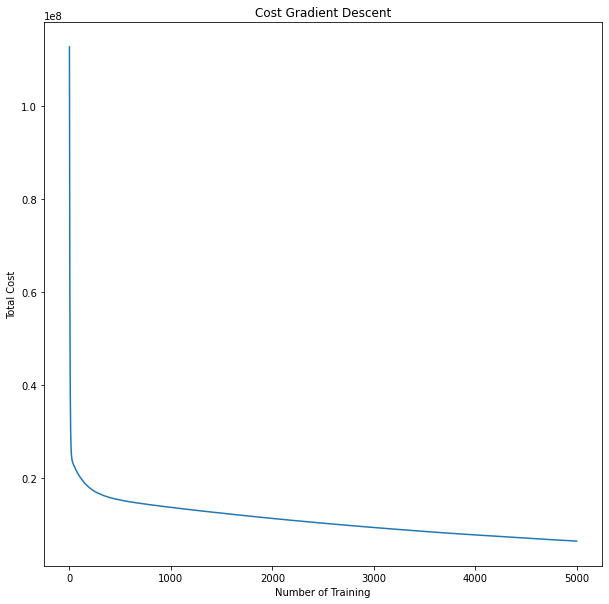

In [27]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title("Cost Gradient Descent")
plt.ylabel("Total Cost")
plt.xlabel("Number of Training")
plt.show()

In [28]:
print("%20s %20s " % ("Step", "Cost") + "\n")
for step in range(learning_epochs):
  if step%100 == 0:
    cost_val = history.history['loss'][step]
    print("%20i %20.5f" %(step, cost_val))

                Step                 Cost 

                   0      112676928.00000
                 100       20452428.00000
                 200       17963754.00000
                 300       16655974.00000
                 400       15884062.00000
                 500       15378795.00000
                 600       14975927.00000
                 700       14646139.00000
                 800       14352338.00000
                 900       14063892.00000
                1000       13797161.00000
                1100       13540340.00000
                1200       13276855.00000
                1300       13030040.00000
                1400       12785106.00000
                1500       12549973.00000
                1600       12318883.00000
                1700       12081502.00000
                1800       11859607.00000
                1900       11641814.00000
                2000       11420674.00000
                2100       11204885.00000
                2200       10997

In [29]:
time = 14 #@param {type:"slider", min:0, max:23, step:1}
day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [30]:
time_condition = data_out["집계시"]==time
day_condition = data_out["요일"]==day
selected_data = data_out[time_condition & day_condition]
print(selected_data)

거리   집계시  요일     135           407
101   14   3  5714.0  14671.333333


       집계시         요일                                     서울에서 부산까지 통행시간

                 135          5714.000000          5254.212402                  459

                 407         14671.333333         14246.810547                  424



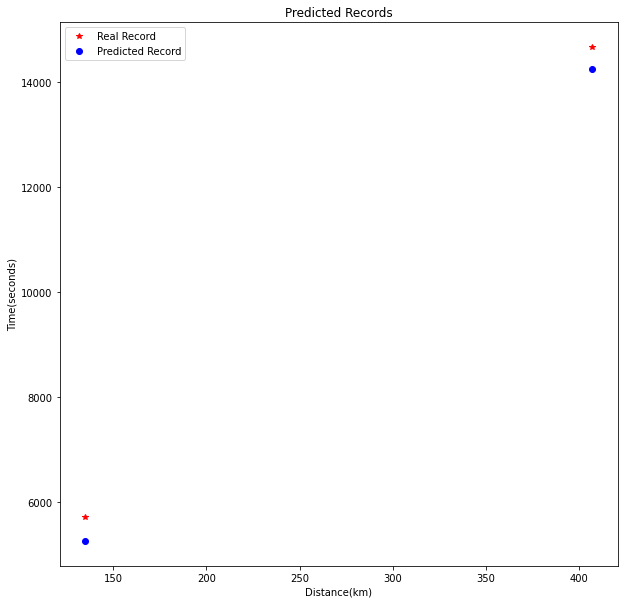

In [33]:
input = [time, day]
p_time = model.predict([input])
distance = [135, 407]

plt.figure(figsize=(10,10))
p_xdata, p_ydata = [], []
r_ydata = [selected_data[135], selected_data[407]]

print("%10s %10s %50s" %("집계시", "요일", "서울에서 부산까지 통행시간")+ "\n")
for index in range(len(p_time[0])):
  dist_time = p_time[0][index]
  real_time = r_ydata[index]
  variation = real_time - dist_time
  p_xdata.append(distance[index])
  p_ydata.append(dist_time)
  print("%20d %20f %20f %20i" %(distance[index], real_time, dist_time, variation)+"\n")

plt.plot(p_xdata, r_ydata, 'r*', label="Real Record")
plt.plot(p_xdata, p_ydata, 'bo', label="Predicted Record")
plt.title("Predicted Records")
plt.ylabel("Time(seconds)")
plt.xlabel("Distance(km)")
plt.legend()
plt.show()